### importamos las librerias a utilizar

In [126]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os

### Preparacion de espacio de trabajo

especificamos la ruta de nuestro dataset, un arreglo para guardar las categorias que vayamos encontrando y la dimension a trabajar con nuestras imagenes

In [127]:
DATADIR = '/home/lenin/Documents/datasets/colores'
CATEGORIES = []
IMG_SIZE=30

recorremos el direcotorio excluyendo las imagenes de testeo

In [128]:
for cate in os.listdir(DATADIR):
    if cate == 'testimg': continue
    CATEGORIES.append(cate)
print(f'categorias encontradas: {CATEGORIES}\n total: {len(CATEGORIES)}')

categorias encontradas: ['blanco', 'verde', 'gris', 'negro', 'azul', 'amarillo', 'cafe', 'naranja', 'rosado', 'morado', 'rojo', 'celeste']
 total: 12


### Recoleccion de datos
recorremos el directorio tomando cada imagen segun su respectiva categoria

In [129]:
training_data=[] #var para los datos recolectados
labels=0
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for fname in os.listdir(path):
        img = load_img((path+'/'+fname), target_size=(IMG_SIZE,IMG_SIZE))
        x = img_to_array(img)
        x=x/255
        training_data.append([x,labels])
    labels+=1
print('done')

done


verificamos el total de datos que tenemos

In [130]:
lenofimage = len(training_data)
print(lenofimage)

2400


### Tratamiento de los datos
separamos  nuestra data en img-labels y los tratamos con numpy

In [131]:
X=[]
y=[]
for img, label in training_data:
    X.append(img)
    y.append(label)
print('done')

done


verificamos la forma de nuestra data

In [132]:
X=np.array(X)
y=np.array(y)
print('labels',y.shape)
print('img',X.shape)

labels (2400,)
img (2400, 30, 30, 3)


dividimos la data para train y test

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(f'train: {len(X_train)}, test: {len(X_test)}')

train: 1800, test: 600


### Creacion del modelo
creamos la arquitectura del modelo, lo compilamos y finalmente ajustamos

In [134]:
# model = Sequential()
# model.add(Flatten(input_shape=(X_train[0].shape)))
# model.add(Dense(len(CATEGORIES), activation='softmax'))


In [183]:
model = Sequential([
    Conv2D(32, (2,2), activation='relu', padding='SAME', input_shape=X_train[0].shape),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(len(CATEGORIES), activation='softmax'),
])

In [136]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        416       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_31 (Flatten)        (None, 7200)              0         
                                                                 
 dense_77 (Dense)            (None, 10)                72010     
                                                                 
 dense_78 (Dense)            (None, 12)                132       
                                                                 
Total params: 72,558
Trainable params: 72,558
Non-trainable params: 0
_________________________________________________

In [184]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=19, batch_size=25)

Epoch 1/19
72/72 [==============================] - 2s 13ms/step - loss: 1.9792 - accuracy: 0.2856
Epoch 2/19
72/72 [==============================] - 1s 12ms/step - loss: 1.3014 - accuracy: 0.5606
Epoch 3/19
72/72 [==============================] - 1s 12ms/step - loss: 0.7931 - accuracy: 0.7539
Epoch 4/19
72/72 [==============================] - 1s 13ms/step - loss: 0.4524 - accuracy: 0.8750
Epoch 5/19
72/72 [==============================] - 1s 13ms/step - loss: 0.3111 - accuracy: 0.9028
Epoch 6/19
72/72 [==============================] - 1s 12ms/step - loss: 0.2898 - accuracy: 0.8961
Epoch 7/19
72/72 [==============================] - 1s 12ms/step - loss: 0.2420 - accuracy: 0.9150
Epoch 8/19
72/72 [==============================] - 1s 12ms/step - loss: 0.2241 - accuracy: 0.9233
Epoch 9/19
72/72 [==============================] - 1s 13ms/step - loss: 0.2193 - accuracy: 0.9172
Epoch 10/19
72/72 [==============================] - 1s 13ms/step - loss: 0.1960 - accuracy: 0.9317
Epoch 11/

verificamos la precision en testeo

In [185]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('test loss',test_loss)
print('test accuracy',test_accuracy)

test loss 0.21533004939556122
test accuracy 0.9449999928474426


### Probamos el modelo entrenado

1/1 [==============================] - 0s 75ms/step
prediccion = amarillo


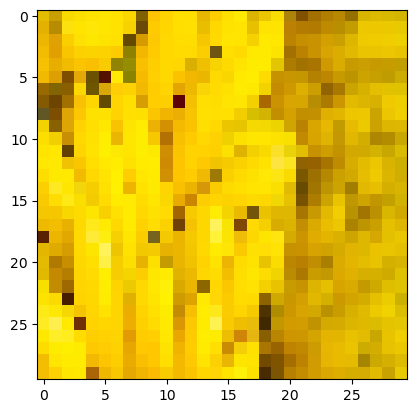

In [186]:
#ruta a nuestras imagenes de test en el directorio, no de la data preparada
path = DATADIR + '/testimg' + '/55.jpg' 

#tratamos la img con el mismo tamanio y la normalizamos
img = load_img(path, target_size=(IMG_SIZE,IMG_SIZE))
x = img_to_array(img)
x=x/255

#agrego un eje para que el modelo lo reciba
x = x[np.newaxis, ...]

#imprimo la img y la prediccion
plt.imshow(img)
resp = model.predict(x)
print(f'prediccion = {CATEGORIES[np.argmax(resp[0])]}')

### Exportacion
con el modelo ya funcionando correctamente, lo exportamos para poder utilizarlo en otros proyectos

In [140]:
# model.save('mod_color_v1.h5')
# model.save_weights("mod_color_v1_weights.h5")

para cargarlos

In [141]:
# # Cargar la estructura del modelo
# modelo_cargado = tf.keras.models.load_model("mod_color_v1.h5")

# # Cargar los pesos del modelo
# modelo_cargado.load_weights("mod_color_v1_weights.h5")
